In [1]:
#Use decision trees to prepare a model on fraud data 
#treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

#Data Description :

#Undergrad : person is under graduated or not
#Marital.Status : marital status of a person
#Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
#Work Experience : Work experience of an individual person
#Urban : Whether that person belongs to urban area or not 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 

In [3]:
credit = pd.read_csv("D:/DataScience/regression/DT/Fraud_check.csv")

In [4]:
credit.shape

(600, 6)

In [5]:
credit.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
credit["Undergrad"].replace({"NO": "0", "YES": "1"}, inplace=True)
credit["Marital.Status"].replace({"Single":"0","Married":"1","Divorced":"2"},inplace=True)
credit["Urban"].replace({"NO":"0", "YES":"1"},inplace=True)

In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
Undergrad          600 non-null object
Marital.Status     600 non-null object
Taxable.Income     600 non-null int64
City.Population    600 non-null int64
Work.Experience    600 non-null int64
Urban              600 non-null object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
credit.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [9]:
columns_names=credit.columns.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population', 'Work.Experience', 'Urban']


In [10]:
credit.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [11]:
credit['Marital.Status'].unique()

array(['0', '2', '1'], dtype=object)

In [12]:
MaritalStatus = credit.groupby('Marital.Status').sum()
MaritalStatus

,Taxable.Income,City.Population,Work.Experience
Marital.Status,,,
0,12266372,23628148,3330
1,9971109,20998653,3101
2,10887544,20621620,2904


In [13]:
risk = credit[credit['Taxable.Income']<= 30000]
print(len(risk))
# print(risk)
good = credit[credit['Taxable.Income']>30000] 
print(len(good))

# df["column1"].replace({"a": "x", "b": "y"}, inplace=True)

#print( 'risk cases: {}'.format(len(credit[credit['Taxable.Income'] <= 30000])))
#print( 'Total cases: {}'.format(len(credit[credit['Taxable.Income']])))

124
476


In [14]:
risk.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
10,0,0,29732,102602,19,1
12,0,2,11794,148033,14,1
16,1,2,24987,34551,29,0
19,0,0,10987,126953,30,1
21,1,2,14310,29106,7,1


In [15]:
good.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,68833,50047,10,1
1,1,2,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,0,50190,193264,15,1
4,0,1,81002,27533,28,0


In [16]:
risk.describe()

,Taxable.Income,City.Population,Work.Experience
count,124.000000,124.000000,124.000000
mean,19877.233871,109940.370968,15.524194
std,6213.561887,48780.051357,8.423220
min,10003.000000,26814.000000,0.000000
25%,14380.000000,74395.250000,9.000000
50%,19787.000000,109276.500000,15.500000
75%,25848.000000,142099.750000,21.250000
max,29944.000000,199174.000000,30.000000


In [17]:
good.describe()

,Taxable.Income,City.Population,Work.Experience
count,476.000000,476.000000,476.000000
mean,64412.285714,108436.586134,15.567227
std,21099.736711,50170.925039,8.956603
min,30167.000000,25779.000000,0.000000
25%,45928.000000,65482.500000,8.000000
50%,64227.500000,105955.000000,15.000000
75%,82864.500000,152640.000000,24.000000
max,99619.000000,199778.000000,30.000000


In [18]:
X = credit.drop(['Taxable.Income'], axis = 1) 
Y = credit["Taxable.Income"] 
 
from sklearn import preprocessing
standardized_X = preprocessing.scale(X)
standardized_Y = preprocessing.scale(Y)

In [19]:
print (X)

    Undergrad Marital.Status  City.Population  Work.Experience Urban
0           0              0            50047               10     1
1           1              2           134075               18     1
2           0              1           160205               30     1
3           1              0           193264               15     1
4           0              1            27533               28     0
..        ...            ...              ...              ...   ...
595         1              2            39492                7     1
596         1              2            55369                2     1
597         0              2           154058                0     1
598         1              1           180083               17     0
599         0              2           158137               16     0

[600 rows x 5 columns]


In [20]:
print(X.shape) 
print(Y.shape)

(600, 5)
(600,)


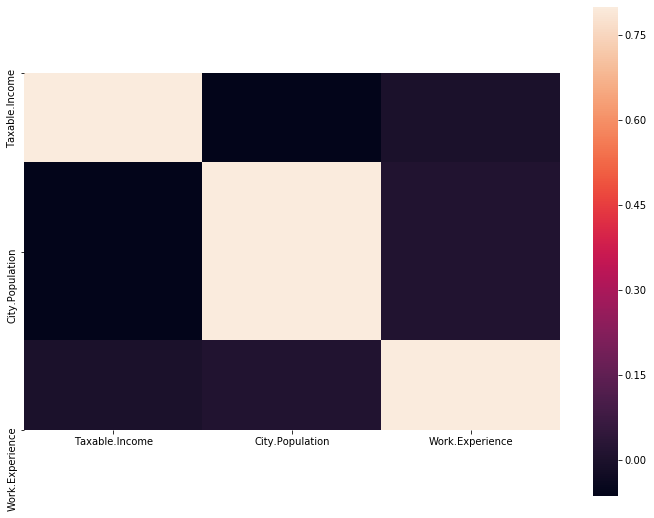

In [21]:
corrmat = credit.corr() 
fig = plt.figure(figsize = (12, 9)) 
sb.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 
#plt.figure(figsize=(10, 10))
#sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

In [22]:
#from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
# Import the decision tree model from sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, average_precision_score

In [24]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Fit a logistic regression model to our data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
y_pred1= model.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report ,precision_score

In [27]:
print('Accuracy on train data with gini:',accuracy_score(y_true=y_train, y_pred=model.predict(X_train)))

Accuracy on train data with gini: 1.0


In [28]:
print('Accuracy on test with gini:',accuracy_score(y_true=y_test, y_pred=model.predict(X_test)))

Accuracy on test with gini: 0.0


In [29]:
model_entropy = DecisionTreeClassifier(criterion = 'entropy')

In [30]:
model_entropy.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
y_pred_entropy = model_entropy.predict(X_test)

In [32]:
print('Accuracy on train data with entropy:',accuracy_score(y_true=y_train, y_pred=model_entropy.predict(X_train)))

Accuracy on train data with entropy: 1.0


In [33]:
print('Accuracy on test with entropy:',accuracy_score(y_true=y_test,y_pred=y_pred_entropy))

Accuracy on test with entropy: 0.0


In [34]:
LABELS = ['RISK', 'GOOD'] 
conf_matrix = confusion_matrix(y_test, y_pred1) 
#plt.figure(figsize =(2,2)) 
sb.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

ValueError: Image size of 363x68094 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 2 Axes>

In [35]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import stringIO
from Ipython.display import Image
import pydotplus

C:\Users\agnis\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


ImportError: cannot import name 'stringIO' from 'sklearn.externals.six' (C:\Users\agnis\Anaconda3\lib\site-packages\sklearn\externals\six.py)

In [ ]:
dot_data = stringIO()
export_graphviz(model,out_file = dot_data,
                filled  = True,rounded=True,
                special_characters=True,feature_names=fraud.feature_names,class_names=fraud.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [ ]:
from sklearn.ensemble import RandomForestClassifier 
# random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(X_train,y_train) 
# predictions 
Y_Pred = rfc.predict(X_test)